In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats

In [2]:
from scipy.stats import uniform

# [1] Using CLT on Unifrom Dist

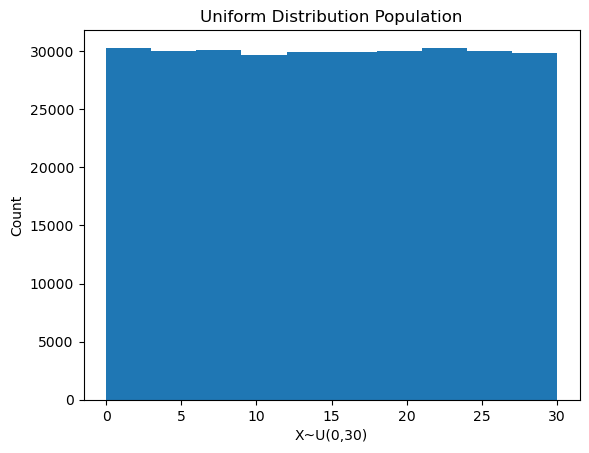

In [28]:
np.random.seed(1)
uniform_pop = uniform.rvs(0, 30, size = 300000) # Random Varibale Simulator
plt.hist(uniform_pop)
plt.title("Uniform Distribution Population")
plt.xlabel("X~U(0,30)")
plt.ylabel("Count")
plt.show()


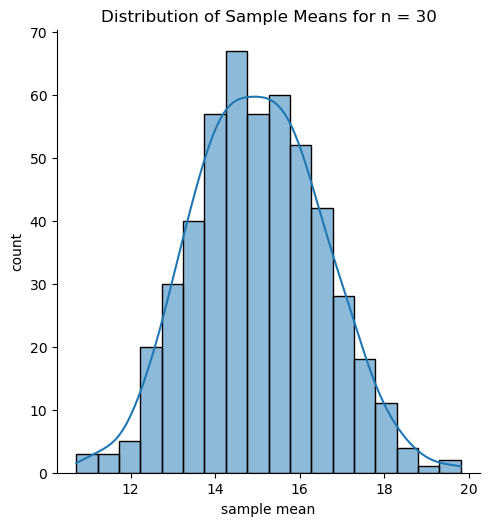

In [57]:
np.random.seed(2)
n = 30 # Sample Size
sample_means = []
for i in range(500):
    sample = np.random.choice(uniform_pop, n) #Takes a random sample of size n from population
    sample_mean = np.mean(sample) # Calculates Mean of the sample taken 
    sample_means.append(sample_mean) # Add sample mean to the list

    
sns.displot(sample_means, kde=True) # Shows Distributions better than sns.histplot()
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

# [2] Using CLT on Normal Dist 

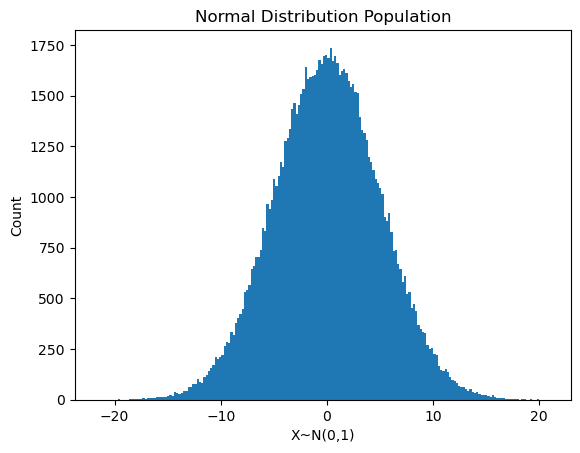

In [9]:
from scipy.stats import norm

np.random.seed(1)
normal_pop = norm.rvs(0, 5, size=100000)
normal_pop.min

plt.hist(normal_pop, 200)
plt.title("Normal Distribution Population")
plt.xlabel("X~N(0,1)")
plt.ylabel("Count")
plt.show()

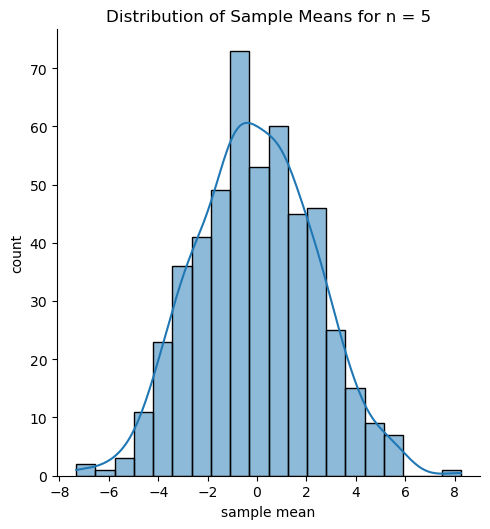

In [73]:
np.random.seed(1)
n = 5 # Sample Size
sample_means = []
for i in range(500):
    sample = np.random.choice(normal_pop, n)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
    
sns.displot(sample_means, kde = True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

# Using CLT on Exponential Dist

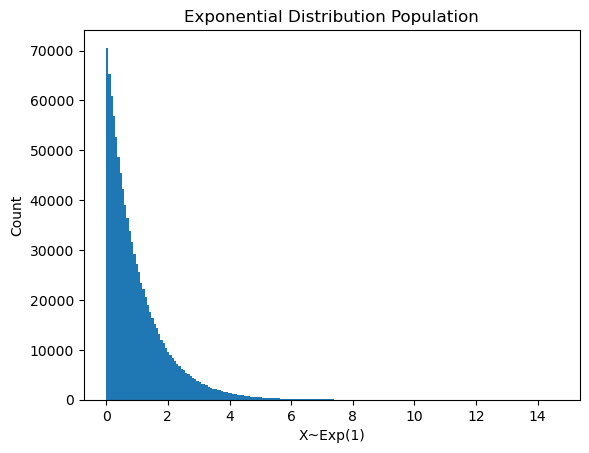

In [80]:
from scipy.stats import expon

np.random.seed(1)
exp_pop = expon.rvs(size = 1000000)

plt.hist(exp_pop, 200)
plt.title("Exponential Distribution Population")
plt.xlabel("X~Exp(1)")
plt.ylabel("Count")
plt.show()

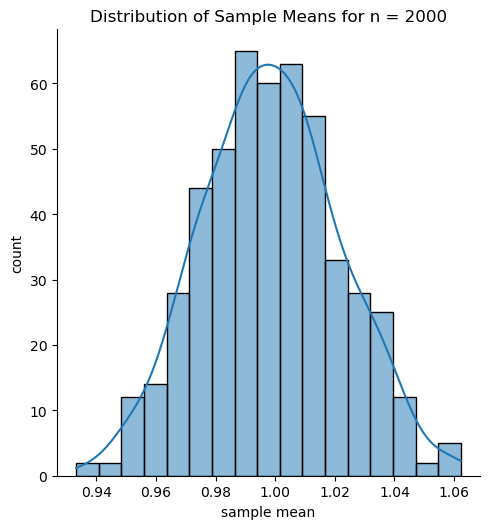

In [84]:
np.random.seed(1)
n = 2000 # Sample Size
sample_means = []
for i in range(500):
    sample = np.random.choice(exp_pop, n)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
    
sns.displot(sample_means, kde = True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

In [8]:
# set the values of population mean and population standard deviation to 5 and 1.3 respectively
mu, sigma = 5, 1.3

# set the value sample mean to 5.25
x_bar = 5.25

# calculate the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(45))
test_stat

1.2900392177883402

## 1.29 standard deviations away from the mean

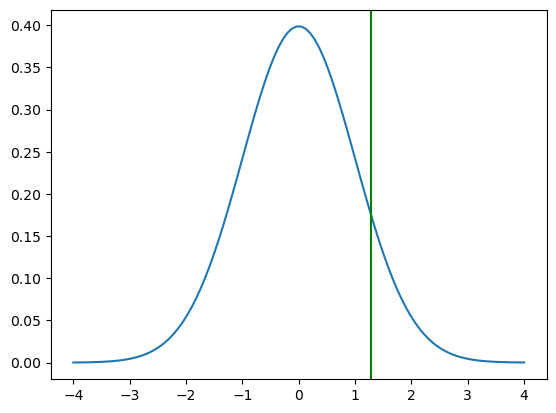

In [9]:
from scipy.stats import norm

x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4

# norm.pdf(x, mean, std dev)
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = test_stat, color = 'green') # draw a vertical red line through the mentioned point
plt.show() # display the plot

In [36]:
# Area under curve past the green line
# This gives probability of getting that value from the sameple
1 - norm.cdf(test_stat)

0.09851852092578695

### Around 10% chance of getting a value equal to or greater than 5.25:
- relatively unlikely 
- however it is not unlikely enough to match alpha
- Therefore fail to reject the null hypothesis

In [51]:
# Z-Stat at which cdf will be equal to alpha at the right end
# Also Known as critical value
critical_val = norm.ppf(0.95)

critical_val

1.6448536269514722

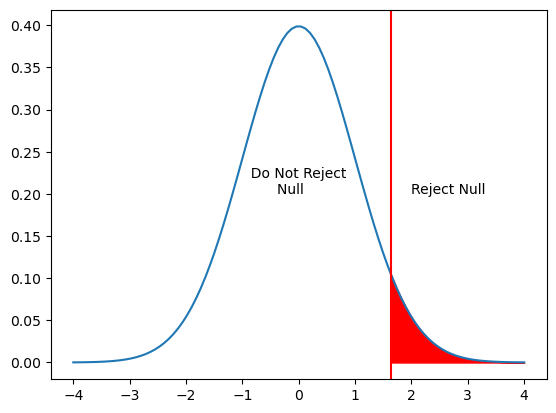

In [54]:
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = critical_val, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(critical_val, 4, 50) # create an array of 50 numbers starting from the critical value and ending at 4
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve after the critical value with red color
plt.annotate('Reject Null', (2, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.show() # display the plot

## Two-tailed Test

In [4]:
# Ho mu = 600
# Ha mu /= 600

mu = 600
sigma = 50

n = 36
x_bar = 580
alpha = 0.05
alpha_2 = 0.025

Z = (x_bar - mu)/(sigma/np.sqrt(n))
Z

-2.4

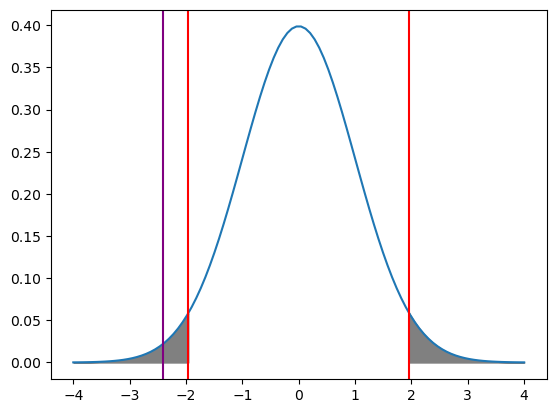

In [23]:
x = np.linspace(-4,4,100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(Z, c = 'purple')
plt.axvline(critical_val, c = 'r')
plt.axvline(critical_val2, c = 'r')

x1 = np.linspace(critical_val,4,100)
plt.fill_between(x1, norm.pdf(x1,0,1), color='gray')

x2 = np.linspace(-4,critical_val2,100)
plt.fill_between(x2, norm.pdf(x2,0,1), color='gray')

In [20]:
critical_val = norm.ppf(0.975)
critical_val2 = norm.ppf(0.025)
critical_val

1.959963984540054

In [3]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats 

In [4]:
from statsmodels.stats.proportion import proportions_ztest 
proportions_ztest(count = [20, 40], nobs = [100, 150], value = 0, alternative = 'two-sided')

(-1.2091270835166859, 0.2266140255857575)

In [5]:
import scipy.stats as stats
import numpy as np

# scores of two groups (0 and 1) of students
scores = np.array([[49, 0],[53, 1],[56, 1],[43, 1],[45, 1],[53, 1],[45, 1],[56, 1],[51, 0],[43, 0],[47, 1],[44, 0],[51, 0],[53, 1],[50, 0],[54, 0],[51, 0],[51, 1],[46, 0],[47, 1]])

# Separating the data into 2 groups

group1 = scores[scores[:, 1] == 0] # elements of the array where group == 0
group1 = group1[:, 0] # scores of group 0 students
group2 = scores[scores[:, 1] == 1] # elements of the array where group == 1
group2 = group2[:, 0] # scores of group 1 students

#applying t-test to check if the scores of group 0 and group 1 students are indeed different
stats.ttest_ind(group1, group2, equal_var = False)

Ttest_indResult(statistic=-0.607694899652158, pvalue=0.5509860214402561)

In [12]:
from statsmodels.stats.proportion import proportions_ztest 
proportions_ztest(count = 125, nobs = 150, value = 0.9, alternative = 'smaller')

(-2.190890230020664, 0.014229868458155314)